<a href="https://colab.research.google.com/github/Gilles2711/programing/blob/main/Enron%20assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enron Email Analysis**

# Introduction

# Coding

In [1]:
!pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.2 MB 1.4 MB/s 


In [2]:
#import Enron.db
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2rBi5wtHbswBH2kd2uTnz6r1ka7GI36GUQ?download=1

--2022-05-28 17:06:32--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2rBi5wtHbswBH2kd2uTnz6r1ka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106371 (104K) [text/html]
Saving to: ‘enron.db’

enron.db            100%[===================>] 103.88K   243KB/s    in 0.4s    

2022-05-28 17:06:34 (243 KB/s) - ‘enron.db’ saved [106371/106371]



In [3]:
# Import sqlite3 & Pandas
import sqlite3
import pandas

In [4]:
#create & connection & cursor object
conn = sqlite3.connect('/content/extract (2).db')
cur = conn.cursor()

In [5]:
#Create Message table
sql = """
create table if not exists Message(
  mid INT PRIMARY KEY,
  Sender TEXT,
  Date REAL,
  Subject TEXT,
  Message_ID REAL,
  Body TEXT,
  Folder TEXT
);
"""
# Execute query & commit transaction
cur.execute(sql)
conn.commit()

In [6]:
#create Recipient info table
sql = """
CREATE TABLE IF NOT EXISTS RecipientInfo(
  rid TEXT PRIMARY KEY,
  mid TEXT,
  Rtype REAL,
  Rvalue TEXT
);
"""
#Execute query & commit transaction
cur.execute(sql)
conn.commit()

In [7]:
# create Reference info table
sql = """
CREATE TABLE IF NOT EXISTS ReferenceInfo(
  Rfid TEXT PRIMARY KEY,
  mid TEXT,
  Reference REAL
);
"""
#Execute query & commit transaction
cur.execute(sql)
conn.commit()

## Emails sent by senders

In [8]:
 sql1 = """
SELECT sender, count(mid) AS message_count
 FROM message
 GROUP BY sender
 ORDER BY message_count
 DESC
 LIMIT 10
 ;
"""
#Execute sql query
rows = cur.execute(sql1)
for row in rows:
  print(row)

('carla.hoffman@enron.com', 15)
('office.chairman@enron.com', 10)
('enron.announcements@enron.com', 9)
('crcommunications@caiso.com', 8)
('awe@caiso.com', 7)
('cgrant@caiso.com', 6)
('shari.stack@enron.com', 5)
('bwoertz@caiso.com', 4)
('jblatchford@caiso.com', 4)
('shapp@caiso.com', 4)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Message send per day

In [10]:
sql = """
SELECT date(Date) AS date_emailsent, count(mid) AS message_count
     FROM message
     GROUP BY date_emailsent
     ORDER BY date_emailsent;
"""
#Execute SQL query
rows = cur.execute(sql)
for row in rows:
  print(row)

('2000-01-21', 1)
('2000-01-24', 2)
('2000-02-02', 1)
('2000-02-07', 1)
('2000-05-17', 1)
('2000-05-21', 1)
('2000-06-07', 1)
('2000-06-21', 1)
('2000-06-27', 1)
('2000-07-10', 1)
('2000-07-25', 1)
('2000-07-27', 1)
('2000-07-31', 2)
('2000-08-02', 2)
('2000-08-03', 3)
('2000-08-04', 3)
('2000-08-07', 2)
('2000-08-08', 1)
('2000-08-09', 2)
('2000-08-11', 2)
('2000-08-14', 2)
('2000-08-15', 2)
('2000-08-16', 3)
('2000-08-17', 3)
('2000-08-18', 1)
('2000-08-20', 2)
('2000-08-21', 1)
('2000-08-22', 6)
('2000-08-23', 9)
('2000-08-24', 16)
('2000-08-25', 15)
('2000-08-26', 5)
('2000-08-27', 1)
('2000-08-28', 16)
('2000-08-29', 22)


In [11]:
import pandas as pd
sql = """
SELECT date(date) AS date_emailsent,count(mid) AS MESSAGE_COUNT
     FROM message
     GROUP BY date_emailsent
     ORDER BY date_emailsent;
"""
#Dataframe
note_df = pd.read_sql_query(sql,conn)
note_df

,date_emailsent,MESSAGE_COUNT
0,2000-01-21,1
1,2000-01-24,2
2,2000-02-02,1
3,2000-02-07,1
4,2000-05-17,1
5,2000-05-21,1
6,2000-06-07,1
7,2000-06-21,1
8,2000-06-27,1
9,2000-07-10,1


# Graph plot

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

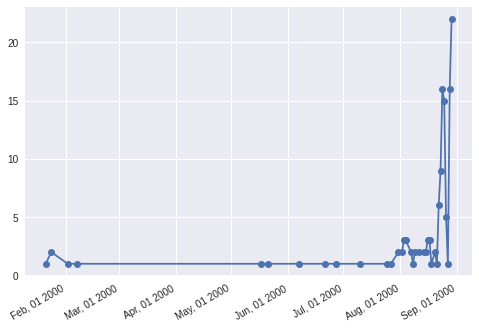

In [20]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')
dates = [
         datetime(2000, 1, 21),
         datetime(2000, 1, 24),
         datetime(2000, 2, 2),
         datetime(2000, 2, 7),
         datetime(2000,5 ,17),
         datetime(2000, 5, 21),
         datetime(2000, 6, 7),
         datetime(2000, 6, 21),
         datetime(2000, 6, 27),
         datetime(2000, 7, 10),
         datetime(2000, 7, 25),
         datetime(2000, 7, 27),
         datetime(2000, 7, 31),
         datetime(2000, 8, 2),
         datetime(2000, 8, 3),
         datetime(2000, 8, 4),
         datetime(2000, 8, 7),
         datetime(2000, 8, 8),
         datetime(2000, 8, 9),
         datetime(2000, 8, 11),
         datetime(2000, 8, 14),
         datetime(2000, 8, 15),
         datetime(2000, 8, 16),
         datetime(2000, 8, 17),
         datetime(2000, 8, 18),
         datetime(2000, 8, 20),
         datetime(2000, 8, 21),
         datetime(2000, 8, 22),
         datetime(2000, 8, 23),
         datetime(2000, 8, 24),
         datetime(2000, 8, 25),
         datetime(2000, 8, 26),
         datetime(2000, 8, 27),
         datetime(2000, 8, 28),
         datetime(2000, 8, 29),
        
]
y = [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 2, 1, 2, 2, 2, 2, 3, 3, 1, 2, 1, 6, 9, 16, 15, 5, 1, 16, 22]


plt.plot_date(dates, Y, linestyle='solid')
plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.show()
